<a href="https://colab.research.google.com/github/Tejas08wi/Doctor-Patient/blob/main/GPT4_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(
        "/content/gpt-4.csv",
        encoding='utf-8',
        nrows=3000,
        on_bad_lines='skip'
    )


In [3]:
df.head()

,data,conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat..."
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat..."
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat..."
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda..."


In [4]:
df.tail()

,data,conversation
2995,A 43-year-old female with dyspnoea was transfe...,Doctor: Good afternoon. You were transferred t...
2996,A 63-year-old female presented in 2016 with pa...,"Doctor: Hello, how are you feeling today?\nPat..."
2997,"A 72 year old female, with no significant past...","Doctor: Good morning, how are you feeling toda..."
2998,A 32-year-old female at pregnancy week 22 was ...,"Doctor: Hello, how are you feeling today?\nPat..."
2999,We report a case of a 40-year-old female (grav...,"Doctor: Hello, how can I help you today?\nPati..."


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [6]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
## Randomly select 1000 row
new_df= df.sample(n=1000, random_state=42)

In [9]:
## Set the index
new_df.reset_index(drop=True, inplace=True)

In [10]:
df.head()

,data,conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat..."
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat..."
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat..."
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda..."


In [11]:
!pip install nltk
import nltk

nltk.download('punkt_tab') # Download the missing punkt_tab resource

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
lem = WordNetLemmatizer()

stop = set(stopwords.words('english'))
additional_stopwords = {"doctor", "patient", "okay", "thank", "hello", "morning"}
# medical_terms_to_remove = {"oxygen", "saturation", "dyspnea", "therapy", "exercise", "breathing"}
stop.update(additional_stopwords)
# stop.update(medical_terms_to_remove)

# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lem.lemmatize(word) for word in tokens if word.isalnum() and word not in stop]
    return ' '.join(tokens)

new_df['cleaned_text'] = new_df['conversation'].apply(preprocess_text)


In [13]:
all_words = ' '.join(new_df['cleaned_text'])
word_counts = Counter(all_words.split())

In [14]:
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

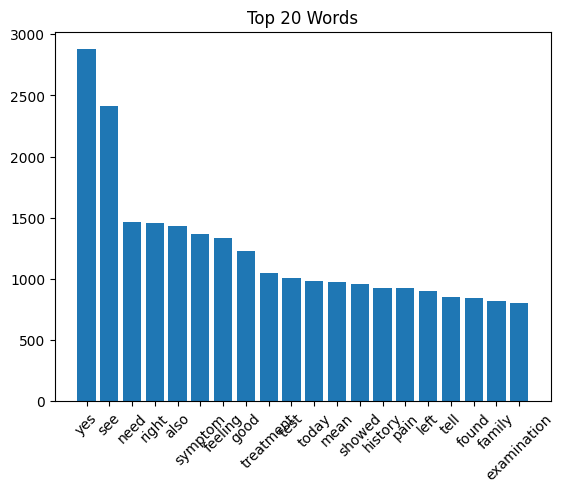

In [15]:
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Top 20 Words')
plt.show()

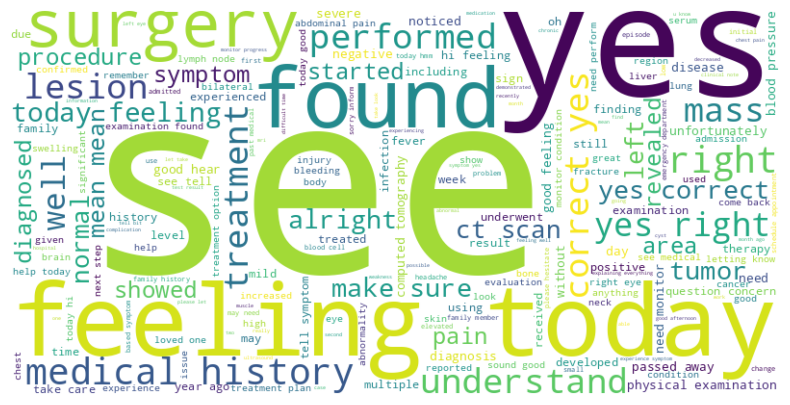

In [16]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

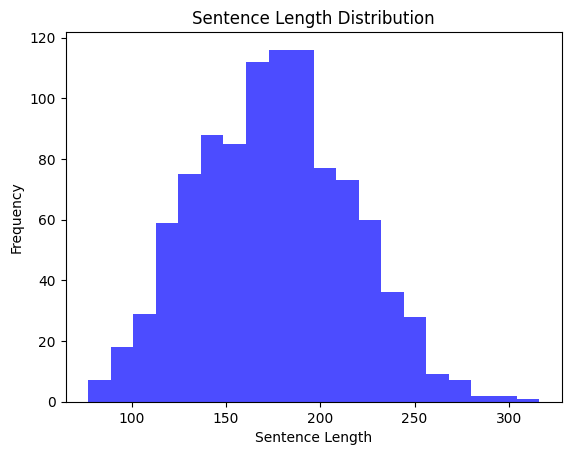

In [17]:
## Add the sentence length column
new_df['sentence_length'] = new_df['cleaned_text'].apply(lambda x: len(x.split()))

plt.hist(new_df['sentence_length'], bins=20, color='blue', alpha=0.7)
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [18]:
from textblob import TextBlob

## Sentiment analysis
def analyze_sentiment(text):
    analysis=TextBlob(text)
    return analysis.sentiment.polarity

new_df['sentiment']=new_df['cleaned_text'].apply(analyze_sentiment)

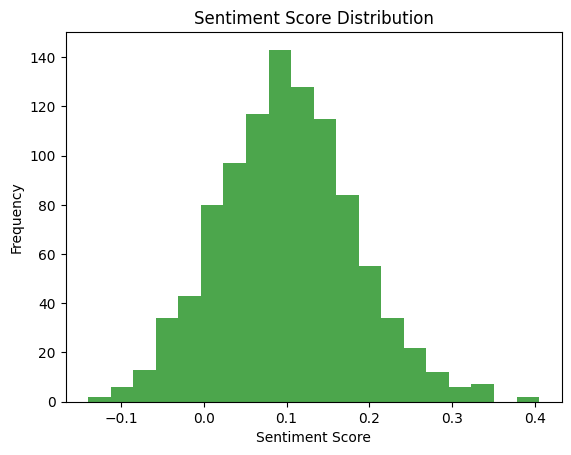

In [19]:
# Plot sentiment distribution
plt.hist(new_df['sentiment'], bins=20, color='green', alpha=0.7)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Categorize sentiment
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

new_df['sentiment_category'] = new_df['sentiment'].apply(categorize_sentiment)

print(new_df['sentiment_category'].value_counts())


sentiment_category
Neutral     510
Positive    486
Negative      4
Name: count, dtype: int64


In [21]:
def classify_conversation(text):
    emergency_keywords = {'emergency', 'urgent', 'critical', 'severe', 'immediate', 'life-threatening', 'dyspnea', 'oxygen desaturation'}


    general_query_keywords = {'question', 'how', 'why', 'what', 'can', 'help', 'clarify', 'information'}

    if any(keyword in text for keyword in emergency_keywords):
        return 'Emergency Query'
    elif any(keyword in text for keyword in general_query_keywords):
        return 'General Query'
    else:
        return 'Other'

new_df['conversation_type'] = new_df['cleaned_text'].apply(classify_conversation)

print(new_df['conversation_type'].value_counts())


conversation_type
General Query      544
Emergency Query    424
Other               32
Name: count, dtype: int64


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
new_df

,data,conversation,cleaned_text,sentence_length,sentiment,sentiment_category,conversation_type
0,The third case was a 64-year-old female who ad...,"Doctor: Good afternoon, how are you feeling to...",good afternoon feeling today hmm great actuall...,121,0.141667,Positive,General Query
1,A 34-year-old woman presented with severe epis...,"Doctor: Good morning, how can I help you today...",good help today hi experiencing severe headach...,185,0.018452,Neutral,Emergency Query
2,"A 53-year-old man, who had non-exertional ches...","Doctor: Hello, Mr. Johnson. How are you feelin...",johnson feeling today feeling see hospitalized...,181,0.077932,Neutral,General Query
3,"A 34 year old woman from the east of Morocco, ...","Doctor: Good afternoon, Mrs. X. I see here in ...",good afternoon see medical record admitted eme...,162,0.156364,Positive,Emergency Query
4,A 19-year-old male of Caucasian origin was adm...,"Doctor: Hello, how are you feeling today?\nPat...",feeling today alright see admitted hospital ro...,214,0.110326,Positive,Emergency Query
...,...,...,...,...,...,...,...
995,A ten-year-old neutered female Cavalier King C...,"Doctor: Hello, how are you today?\nPatient: I'...",today thanks asking see medical record neutere...,184,0.079985,Neutral,General Query
996,A 65-year-old man with continuous irritable co...,"Doctor: Good morning, Mr. Johnson. How are you...",good johnson feeling today hmm feeling great c...,273,0.207400,Positive,General Query
997,A 55-year-old woman without relevant medical h...,"Doctor: Hi, how are you feeling today?\nPatien...",hi feeling today lot pain imagine referred bur...,196,0.007062,Neutral,General Query
998,A 52-year-old man was first diagnosed with HIV...,"Doctor: Hi there, how are you feeling today?\n...",hi feeling today good experiencing abdominal p...,194,0.024896,Neutral,Emergency Query


In [24]:
X = new_df['cleaned_text']
y = new_df['conversation_type']

In [25]:
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = rf_model.predict(X_test)

In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

Emergency Query       0.89      0.89      0.89       104
  General Query       0.86      0.93      0.89       134
          Other       0.00      0.00      0.00        12

       accuracy                           0.87       250
      macro avg       0.58      0.61      0.59       250
   weighted avg       0.83      0.87      0.85       250



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 93  11   0]
 [ 10 124   0]
 [  2  10   0]]


In [31]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.868


In [32]:
sample_conversations = ['''An emergency medical condition is a sudden and severe health issue that requires immediate medical attention to prevent further harm or life-threatening complications. These conditions can affect various aspects of the body and often demand prompt intervention by healthcare professionals.

Common Emergency Medical Conditions:
Cardiac Emergencies:

Heart attack (myocardial infarction): Symptoms include chest pain, shortness of breath, nausea, and excessive sweating.
Cardiac arrest: A sudden loss of heart function, leading to a loss of consciousness and breathing.
Respiratory Emergencies:

Severe asthma attack: Difficulty breathing, wheezing, and oxygen desaturation.
Acute respiratory distress syndrome (ARDS): Fluid build-up in the lungs, leading to severe breathing difficulty.
Neurological Emergencies:

Stroke: Sudden numbness, weakness (especially on one side of the body), difficulty speaking, and confusion.
Seizures: Uncontrolled electrical activity in the brain causing convulsions or loss of consciousness.
Trauma and Injury:

Fractures: Broken bones resulting from accidents or falls.
Severe bleeding: Uncontrolled blood loss due to cuts, punctures, or internal injuries.
Infections:

Sepsis: A life-threatening response to infection causing organ failure.
Severe COVID-19: Acute respiratory distress, fever, and multi-organ complications.
Allergic Reactions (Anaphylaxis):

Rapid onset of swelling, hives, difficulty breathing, and a drop in blood pressure due to an allergic reaction.
Other Medical Emergencies:

Severe abdominal pain: Indicative of conditions like appendicitis or ectopic pregnancy.
Poisoning: Exposure to harmful substances or drug overdose.
Burns: Extensive burns that penetrate the skin's layers and may cause systemic issues.
Responding to a Medical Emergency:
Recognize the Symptoms: Understanding the signs of common medical emergencies is the first step in providing help.
Call for Help: Contact emergency m''',
                        "How can I reset my password?",
                        '''Medical queries often involve seeking information about symptoms, conditions, treatments, or preventive measures. It is crucial to provide accurate, evidence-based, and comprehensible responses while emphasizing the importance of consulting a qualified healthcare professional for personalized advice.

The response should:

Clarify the Query: Understand whether the user is asking about symptoms, diagnosis, medication, or general health advice.
Provide General Information: Offer concise and relevant explanations about the medical topic, avoiding technical jargon unless it is explained.
Avoid Specific Diagnoses: Encourage professional medical consultation for any specific symptoms or conditions.
Include Preventive Tips: Suggest general health practices like a balanced diet, regular exercise, adequate sleep, and timely medical check-ups where applicable.
Direct to Resources: Mention reliable sources (e.g., WHO, CDC, NHS) or suggest consulting a local healthcare provider.
Example Queries:

“What are the symptoms of the flu?”
“What can I do for a sore throat?”
“How can I manage stress better?”
“Is it safe to take painkillers daily for headaches?”
Disclaimer: Responses are for informational purposes only and not a substitute for professional medical advice, diagnosis, or treatment. Always consult a healthcare provider for any health concerns.''']
sample_features = tfidf_vectorizer.transform(sample_conversations)
sample_predictions = rf_model.predict(sample_features)

In [33]:
print("Sample Predictions:")
for i, conversation in enumerate(sample_conversations):
    print(f"'{conversation}' -> {sample_predictions[i]}")

Sample Predictions:
'An emergency medical condition is a sudden and severe health issue that requires immediate medical attention to prevent further harm or life-threatening complications. These conditions can affect various aspects of the body and often demand prompt intervention by healthcare professionals.

Common Emergency Medical Conditions:
Cardiac Emergencies:

Heart attack (myocardial infarction): Symptoms include chest pain, shortness of breath, nausea, and excessive sweating.
Cardiac arrest: A sudden loss of heart function, leading to a loss of consciousness and breathing.
Respiratory Emergencies:

Severe asthma attack: Difficulty breathing, wheezing, and oxygen desaturation.
Acute respiratory distress syndrome (ARDS): Fluid build-up in the lungs, leading to severe breathing difficulty.
Neurological Emergencies:

Stroke: Sudden numbness, weakness (especially on one side of the body), difficulty speaking, and confusion.
Seizures: Uncontrolled electrical activity in the brain c